Develop a machine learning model that can accurately predict the price of a car 
based on various features and attributes. The model will take into account 
factors such as the car's make, model, Year, Engine Fuel Type, Engine HP, Engine 
Cylinders, and other relevant features.
By leveraging machine learning algorithms and historical car sales data, build a 
predictive model that can provide accurate and reliable price estimates for used 
cars.
Do the following steps: 
Exploratory Data Analysis
Pre-processing
Modelling
Fine tuning

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('data_car.csv')

In [3]:
data.shape

(11914, 16)

### Exploratory Data Analysis

In [4]:
# Display top 5 records
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We shall predict price of car. Hence MRSP will be our target column

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
# Basic statistical summary
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
# Checking null values
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
# Percentage of null values
null_percent = (data.isnull().sum()/data.shape[0])*100
null_data_percent = null_percent[null_percent>0]
null_data_percent = pd.DataFrame(null_data_percent,columns=['Percentage of null values'])
null_data_percent.sort_values(by=['Percentage of null values'],ascending=False)

,Percentage of null values
Market Category,31.408427
Engine HP,0.579151
Engine Cylinders,0.251805
Number of Doors,0.050361
Engine Fuel Type,0.025180


In [9]:
# Checking duplicates
data[data.duplicated()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


Duplicates shall be removed and null values shall be handled

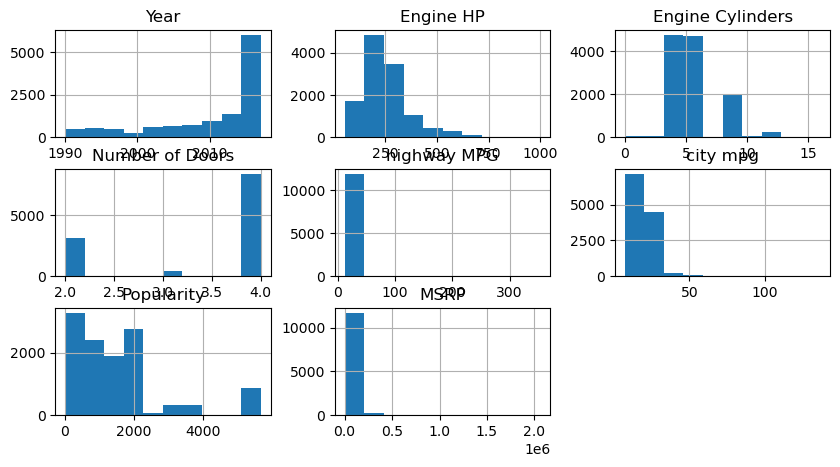

In [10]:
# histograms of numerical data
freqgraph = data.select_dtypes(include=['int64','float64'])
freqgraph.hist(figsize=(10,5))
plt.show()

In [11]:
# Display numerical data
num_data=num_data=data.select_dtypes(include=['int64','float64'])
num_data.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [12]:
# Display categorical data
cat_data=data.select_dtypes(include=['object'])
cat_data.head()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible


Find unique values of categorical data:

In [13]:
data['Make'].nunique()

48

In [14]:
data['Model'].nunique()

915

In [15]:
data['Engine Fuel Type'].nunique()

10

In [16]:
data['Transmission Type'].nunique()

5

In [17]:
data['Driven_Wheels'].nunique()

4

In [18]:
data['Market Category'].nunique()

71

In [19]:
data['Vehicle Size'].nunique()

3

In [20]:
data['Vehicle Style'].nunique()

16

##### Univariate Analysis of Categorical columns

In [21]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

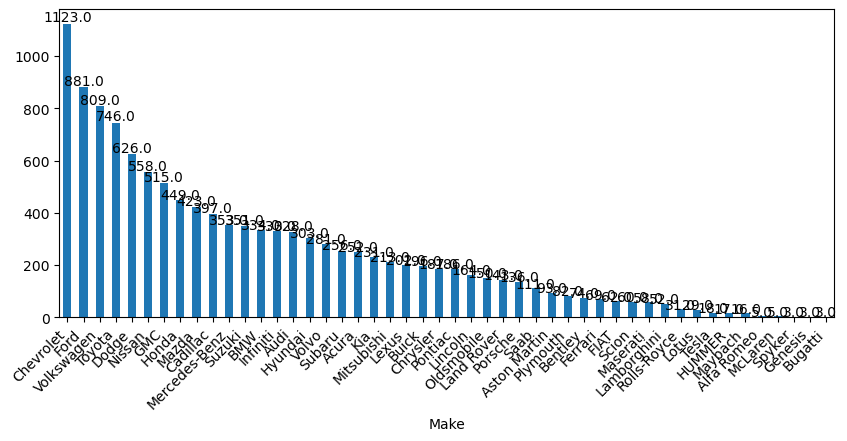

In [22]:
plt.figure(figsize=(10,4))
plot = data['Make'].value_counts().plot(kind='bar')
plt.xlabel('Make')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Chevrolet, ford, Vokswagen, Toyota, Dodge are found to be high in numbers. Bugatti, Genesis, spyker are less

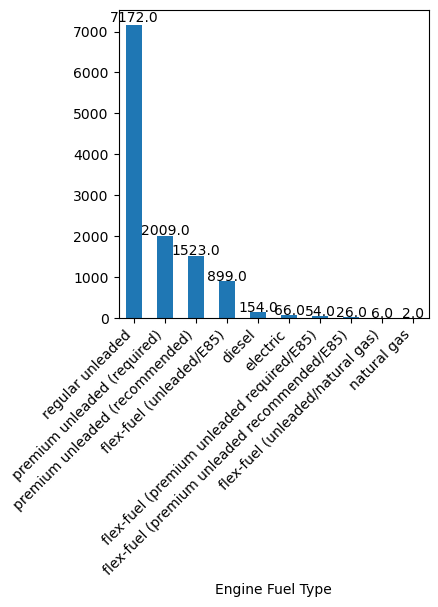

In [23]:
plt.figure(figsize=(4,4))
plot = data['Engine Fuel Type'].value_counts().plot(kind='bar')
plt.xlabel('Engine Fuel Type')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Most cars have got fule type: regular unleaded

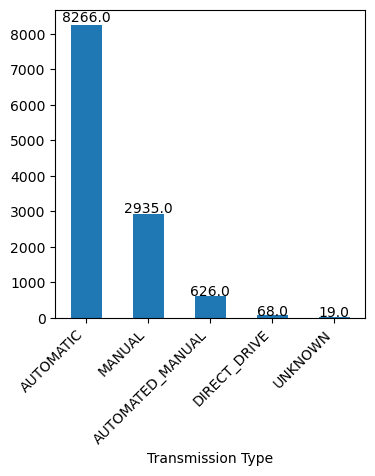

In [24]:
plt.figure(figsize=(4,4))
plot = data['Transmission Type'].value_counts().plot(kind='bar')
plt.xlabel('Transmission Type')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Most cars are automatic

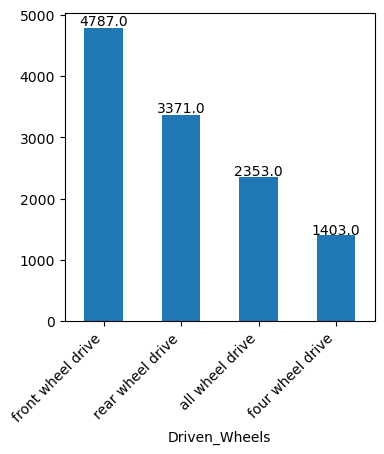

In [25]:
plt.figure(figsize=(4,4))
plot = data['Driven_Wheels'].value_counts().plot(kind='bar')
plt.xlabel('Driven_Wheels')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Most cars have front wheel drive. Less number of cars have four wheel drive

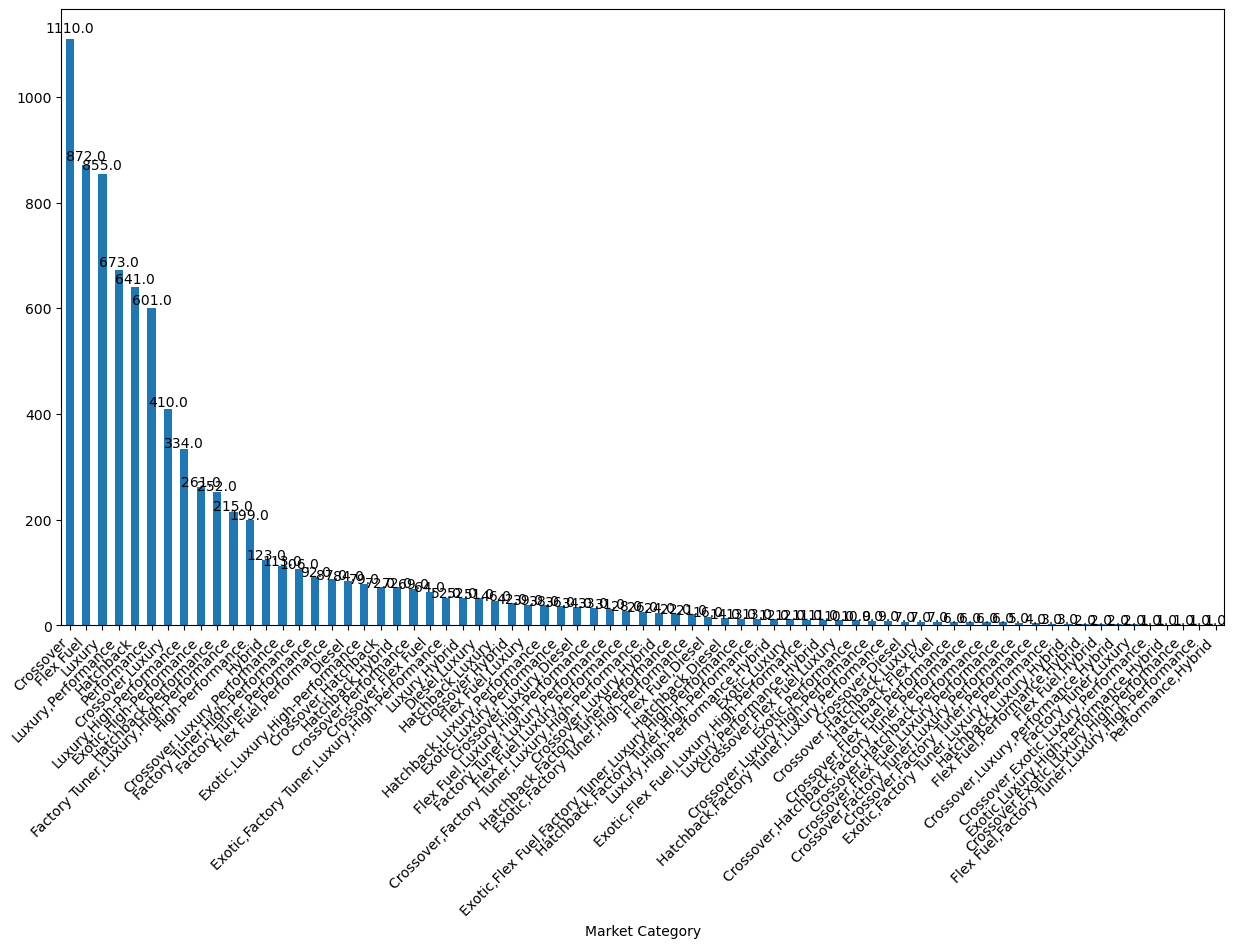

In [26]:
plt.figure(figsize=(15,8))
plot = data['Market Category'].value_counts().plot(kind='bar')
plt.xlabel('Market Category')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Most of the cars belong to make category: Crossover

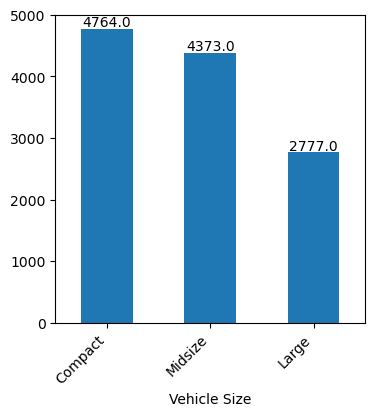

In [27]:
plt.figure(figsize=(4,4))
plot = data['Vehicle Size'].value_counts().plot(kind='bar')
plt.xlabel('Vehicle Size')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Most cars have compact size. Least number of cars are large

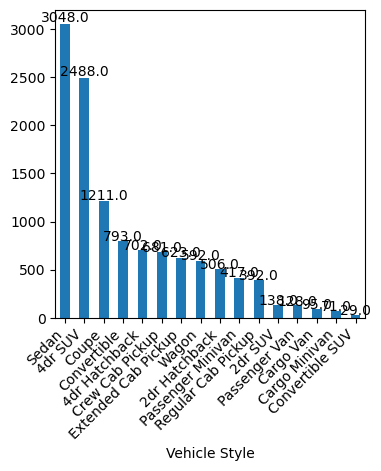

In [28]:
plt.figure(figsize=(4,4))
plot = data['Vehicle Style'].value_counts().plot(kind='bar')
plt.xlabel('Vehicle Style')
plt.xticks(rotation=45, ha='right')
show_values(plot)

Most of the cars belong to Sedan style. Least number of cars are of Style of Convertible SUV

##### Outliers

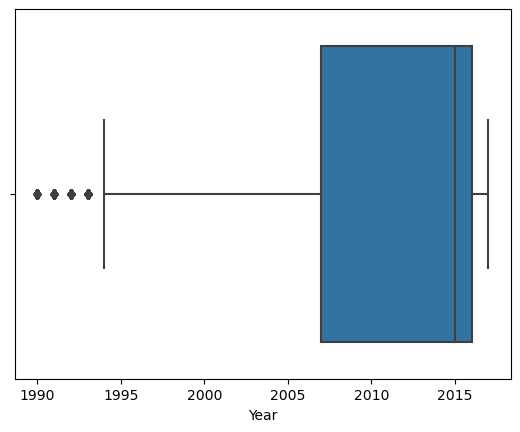

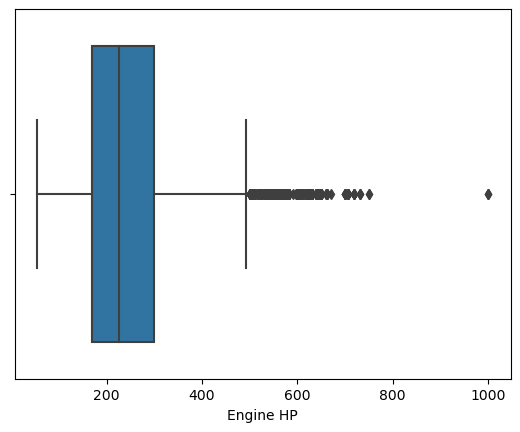

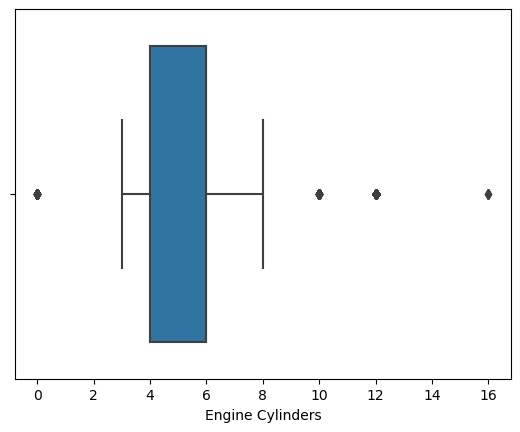

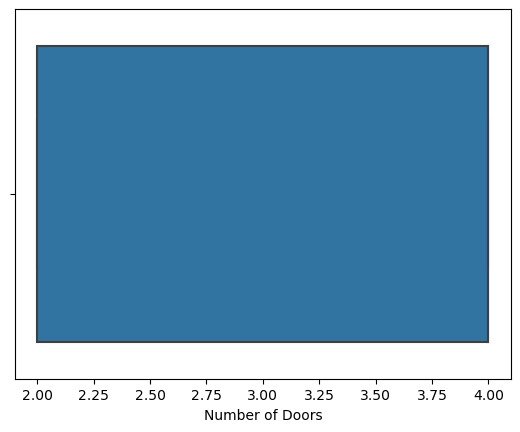

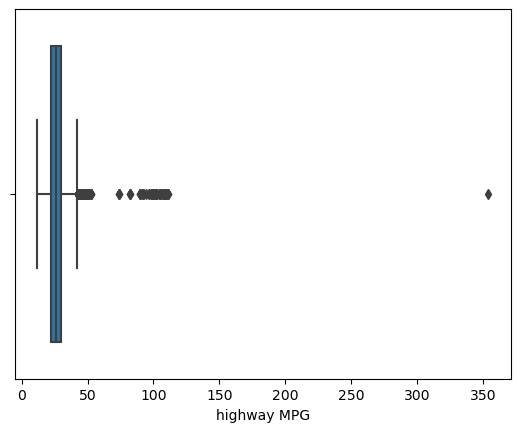

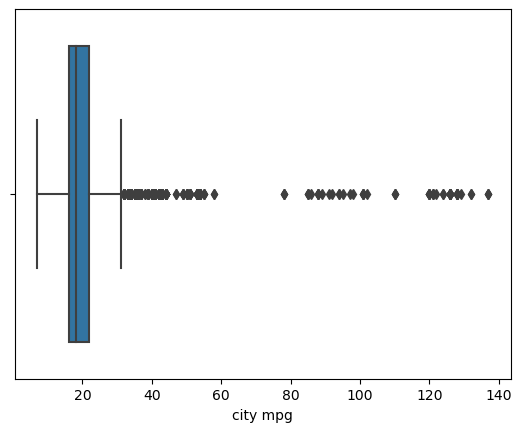

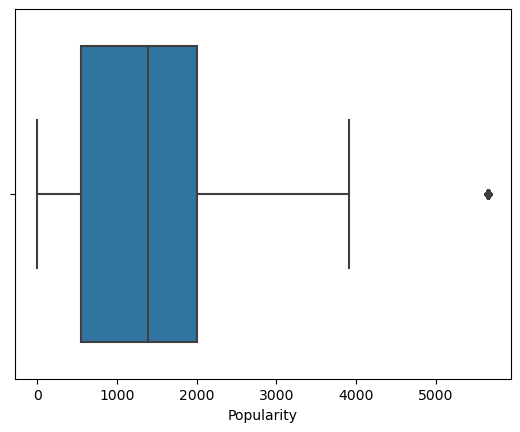

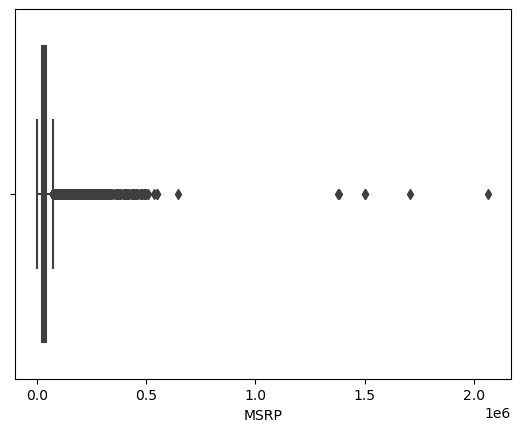

In [29]:
# Find outliers of numberical columns
for i in num_data:
  sns.boxplot(x=num_data[i])
  plt.show()

Outliers are found in Columns: 'Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MRSP'

### Preprocessing

Null handling of columns:
Market Category,
Engine HP,
Engine Cylinders,
Number of Doors,
Engine Fuel Type

In [30]:
# Drop rows containing null values corresponding to columns which has small percentage of null values:
# Drop rows corresponding to columns: Engine HP, Engine Cylinders, Number of Doors, Engine Fuel Type
data.dropna(subset=['Engine HP', 'Engine Cylinders', 'Number of Doors', 'Engine Fuel Type'], inplace=True)

In [31]:
# Fill null values with mode incase of Market Category which contains significant amount of null values
data['Market Category'].fillna(data['Market Category'].mode()[0], inplace=True)

In [32]:
# Delete rows which are duplicates
data.drop_duplicates(inplace=True)

In [33]:
# Copy original data
org_data = data.copy()

##### Label Encoding

In [34]:
# Label encoding Categorical columns: Model, Engine Fuel Type, Transmission Type, Driven_Wheels, Market Category, Vehicle Size, Vehicle Style
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Model']=le.fit_transform(data['Model'])
data['Make']=le.fit_transform(data['Make'])
data['Engine Fuel Type']=le.fit_transform(data['Engine Fuel Type'])
data['Transmission Type']=le.fit_transform(data['Transmission Type'])
data['Driven_Wheels']=le.fit_transform(data['Driven_Wheels'])
data['Market Category']=le.fit_transform(data['Market Category'])
data['Vehicle Size']=le.fit_transform(data['Vehicle Size'])
data['Vehicle Style']=le.fit_transform(data['Vehicle Style'])

In [35]:
# Display top 5 rows
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,7,335.0,6.0,3,3,2.0,37,0,8,26,19,3916,46135
1,4,0,2011,7,300.0,6.0,3,3,2.0,66,0,6,28,19,3916,40650
2,4,0,2011,7,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,36350
3,4,0,2011,7,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,29450
4,4,0,2011,7,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,34500


##### Remove Outliers

Outliers to be handled in columns: 'Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MRSP'
Not handling Outlier in target column

In [36]:
from scipy import stats

In [37]:
# Year
IQR =stats.iqr(data.Year,interpolation='midpoint')
IQR

9.0

In [38]:
Q1=data.Year.quantile(0.25)
Q3=data.Year.quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1993.5, 2029.5)

In [39]:
data.loc[data.Year<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
17,3,2,1992,8,172.0,6.0,3,2,4.0,62,2,14,24,17,3105,2000
19,3,2,1992,8,172.0,6.0,1,0,4.0,62,2,15,20,16,3105,2000
21,3,2,1992,8,172.0,6.0,3,0,4.0,62,2,14,21,16,3105,2000
22,3,2,1993,8,172.0,6.0,3,2,4.0,62,2,14,24,17,3105,2000
23,3,2,1993,8,172.0,6.0,1,0,4.0,62,2,15,20,16,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11374,0,850,1992,8,176.0,5.0,3,2,4.0,62,2,14,24,18,204,2000
11376,0,850,1993,8,176.0,5.0,3,2,4.0,62,2,14,24,18,204,2000
11792,42,877,1991,8,97.0,4.0,3,2,2.0,0,0,8,29,22,640,2000
11793,42,877,1991,8,145.0,6.0,1,2,2.0,0,0,8,26,18,640,2000


In [40]:
# Handle outlier with median since skewed
data.loc[data['Year']<min_limit,'Year']=np.median(data.Year)

In [41]:
data.loc[data.Year<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [42]:
data.loc[data.Year>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [43]:
# Handle 'Engine HP'
IQR =stats.iqr(data['Engine HP'],interpolation='midpoint')
Q1=data['Engine HP'].quantile(0.25)
Q3=data['Engine HP'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-24.5, 499.5)

In [44]:
data.loc[data['Engine HP']<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [45]:
data.loc[data['Engine HP']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
466,13,29,2013,7,562.0,8.0,0,3,2.0,30,0,6,17,13,2774,257412
467,13,29,2013,7,562.0,8.0,0,3,2.0,30,0,8,17,13,2774,233509
468,13,29,2014,7,562.0,8.0,0,3,2.0,30,0,8,17,13,2774,233509
469,13,29,2014,7,597.0,8.0,0,3,2.0,30,0,8,17,13,2774,288000
470,13,29,2014,7,562.0,8.0,0,3,2.0,30,0,6,17,13,2774,257412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11509,4,864,2016,7,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,98800
11510,4,864,2017,7,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,98800
11523,4,866,2015,7,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,102100
11524,4,866,2016,7,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,102200


In [46]:
# Handle outlier with median since skewed
data.loc[data['Engine HP']>max_limit,'Engine HP']=np.median(data['Engine HP'])

In [47]:
data.loc[data['Engine HP']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [48]:
# Handle 'Engine Cylinders'
IQR =stats.iqr(data['Engine Cylinders'],interpolation='midpoint')
Q1=data['Engine Cylinders'].quantile(0.25)
Q3=data['Engine Cylinders'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.0, 9.0)

In [49]:
data.loc[data['Engine Cylinders']<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1680,31,132,2015,1,177.0,0.0,2,2,4.0,56,0,2,82,85,617,41450
1681,31,132,2016,1,177.0,0.0,2,2,4.0,56,0,2,82,85,617,41450
1682,31,132,2017,1,177.0,0.0,2,2,4.0,56,0,2,82,85,617,39900
5790,4,896,2015,1,170.0,0.0,2,3,4.0,56,0,2,111,137,3916,42400
5791,4,896,2016,1,170.0,0.0,2,3,4.0,56,0,2,111,137,3916,42400
5792,4,896,2017,1,170.0,0.0,2,3,4.0,56,0,2,111,137,3916,42400
5793,4,896,2017,1,170.0,0.0,2,3,4.0,56,0,2,106,129,3916,43600
9867,9,761,2014,1,140.0,0.0,2,2,4.0,49,0,2,109,128,1385,26685
9868,9,761,2014,1,140.0,0.0,2,2,4.0,49,0,2,109,128,1385,27010
9869,9,761,2015,1,140.0,0.0,2,2,4.0,49,0,2,109,128,1385,25170


In [50]:
# Handle outlier with median since skewed
data.loc[data['Engine Cylinders']<min_limit,'Engine Cylinders']=np.median(data['Engine Cylinders'])

In [51]:
data.loc[data['Engine Cylinders']<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [52]:
data.loc[data['Engine Cylinders']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
460,13,28,2001,7,442.0,12.0,1,3,2.0,30,0,8,14,9,2774,223970
461,13,28,2001,7,442.0,12.0,3,3,2.0,30,0,8,15,9,2774,219775
462,13,28,2002,7,442.0,12.0,1,3,2.0,30,0,8,14,9,2774,228625
463,13,28,2002,7,442.0,12.0,3,3,2.0,30,0,8,15,9,2774,224585
464,13,28,2003,7,442.0,12.0,1,3,2.0,30,0,8,14,9,2774,228625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,2,852,2012,7,490.0,12.0,1,3,2.0,30,2,8,18,13,259,208295
11395,2,852,2012,7,490.0,12.0,1,3,2.0,30,2,6,18,13,259,223295
11448,38,858,2014,7,240.0,12.0,1,3,2.0,32,1,8,21,13,86,284900
11449,38,858,2015,7,240.0,12.0,1,3,2.0,32,1,8,21,13,86,294025


In [53]:
# Handle outlier with median since skewed
data.loc[data['Engine Cylinders']>max_limit,'Engine Cylinders']=np.median(data['Engine Cylinders'])

In [54]:
data.loc[data['Engine Cylinders']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [55]:
# Handle 'highway MPG'
IQR =stats.iqr(data['highway MPG'],interpolation='midpoint')
Q1=data['highway MPG'].quantile(0.25)
Q3=data['highway MPG'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(10.0, 42.0)

In [56]:
data.loc[data['highway MPG']<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [57]:
data.loc[data['highway MPG']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
135,4,12,2015,0,180.0,4.0,1,3,4.0,24,2,14,45,32,3916,39000
140,4,12,2015,0,180.0,4.0,1,0,4.0,24,2,15,43,31,3916,43450
142,4,12,2015,0,180.0,4.0,1,0,4.0,24,2,14,43,31,3916,41000
1014,3,80,2015,0,150.0,4.0,0,2,4.0,24,0,14,43,31,3105,35150
1015,3,80,2015,0,150.0,4.0,0,2,4.0,24,0,14,43,31,3105,32600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,9,761,2014,1,140.0,6.0,2,2,4.0,49,0,2,109,128,1385,27010
9869,9,761,2015,1,140.0,6.0,2,2,4.0,49,0,2,109,128,1385,25170
9870,9,761,2015,1,140.0,6.0,2,2,4.0,49,0,2,109,128,1385,25560
9871,9,761,2016,1,140.0,6.0,2,2,4.0,49,0,2,109,128,1385,25510


In [58]:
# Handle outlier with median since skewed
data.loc[data['highway MPG']>max_limit,'highway MPG']=np.median(data['highway MPG'])

In [59]:
data.loc[data['highway MPG']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [60]:
# Handle  'city mpg'
IQR =stats.iqr(data['city mpg'],interpolation='midpoint')
Q1=data['city mpg'].quantile(0.25)
Q3=data['city mpg'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(7.0, 31.0)

In [61]:
data.loc[data['city mpg']<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [62]:
data.loc[data['city mpg']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
135,4,12,2015,0,180.0,4.0,1,3,4.0,24,2,14,25,32,3916,39000
146,4,12,2016,0,180.0,4.0,1,3,4.0,24,2,14,42,32,3916,39850
161,4,12,2017,0,180.0,4.0,1,3,4.0,24,2,14,42,32,3916,40250
1202,18,99,2014,8,195.0,4.0,1,2,4.0,61,2,14,25,50,2202,31905
1203,18,99,2014,8,195.0,4.0,1,2,4.0,61,2,14,25,50,2202,29155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10792,29,818,2008,8,133.0,4.0,1,2,4.0,15,0,3,30,34,586,27995
10795,29,818,2008,8,133.0,4.0,1,2,4.0,15,0,3,30,34,586,25485
10796,29,818,2009,8,177.0,4.0,1,2,4.0,15,0,3,31,34,586,29175
10797,29,818,2009,8,177.0,4.0,1,2,4.0,15,0,3,31,34,586,31695


In [63]:
data.loc[data['city mpg']>max_limit,'city mpg']=np.median(data['city mpg'])

In [64]:
data.loc[data['city mpg']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [65]:
# Handle 'Popularity'
IQR =stats.iqr(data['Popularity'],interpolation='midpoint')
Q1=data['Popularity'].quantile(0.25)
Q3=data['Popularity'].quantile(0.75)
# Define the lower and upper thresholds
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1641.0, 4199.0)

In [66]:
data.loc[data['Popularity']<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [67]:
data.loc[data['Popularity']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1331,14,106,1995,8,135.0,6.0,1,3,3.0,0,2,4,22,16,5657,2000
1332,14,106,1995,8,135.0,6.0,1,3,3.0,0,2,11,22,15,5657,2000
1333,14,106,1995,8,155.0,6.0,1,0,3.0,0,1,11,18,14,5657,2000
1334,14,106,1995,8,135.0,6.0,1,3,3.0,0,1,11,22,15,5657,2000
1335,14,106,1996,8,140.0,6.0,1,3,3.0,0,2,11,21,15,5657,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,14,856,2003,8,200.0,6.0,1,2,4.0,0,2,11,22,16,5657,23070
11444,14,856,2003,8,200.0,6.0,1,2,4.0,0,2,11,22,16,5657,26315
11445,14,856,2003,8,200.0,6.0,1,2,4.0,0,2,11,22,16,5657,29230
11446,14,856,2003,8,200.0,6.0,1,2,4.0,0,2,11,22,16,5657,34825


In [68]:
data.loc[data['Popularity']>max_limit,'Popularity']=np.median(data['Popularity'])

In [69]:
data.loc[data['Popularity']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


##### Correlation

<AxesSubplot: >

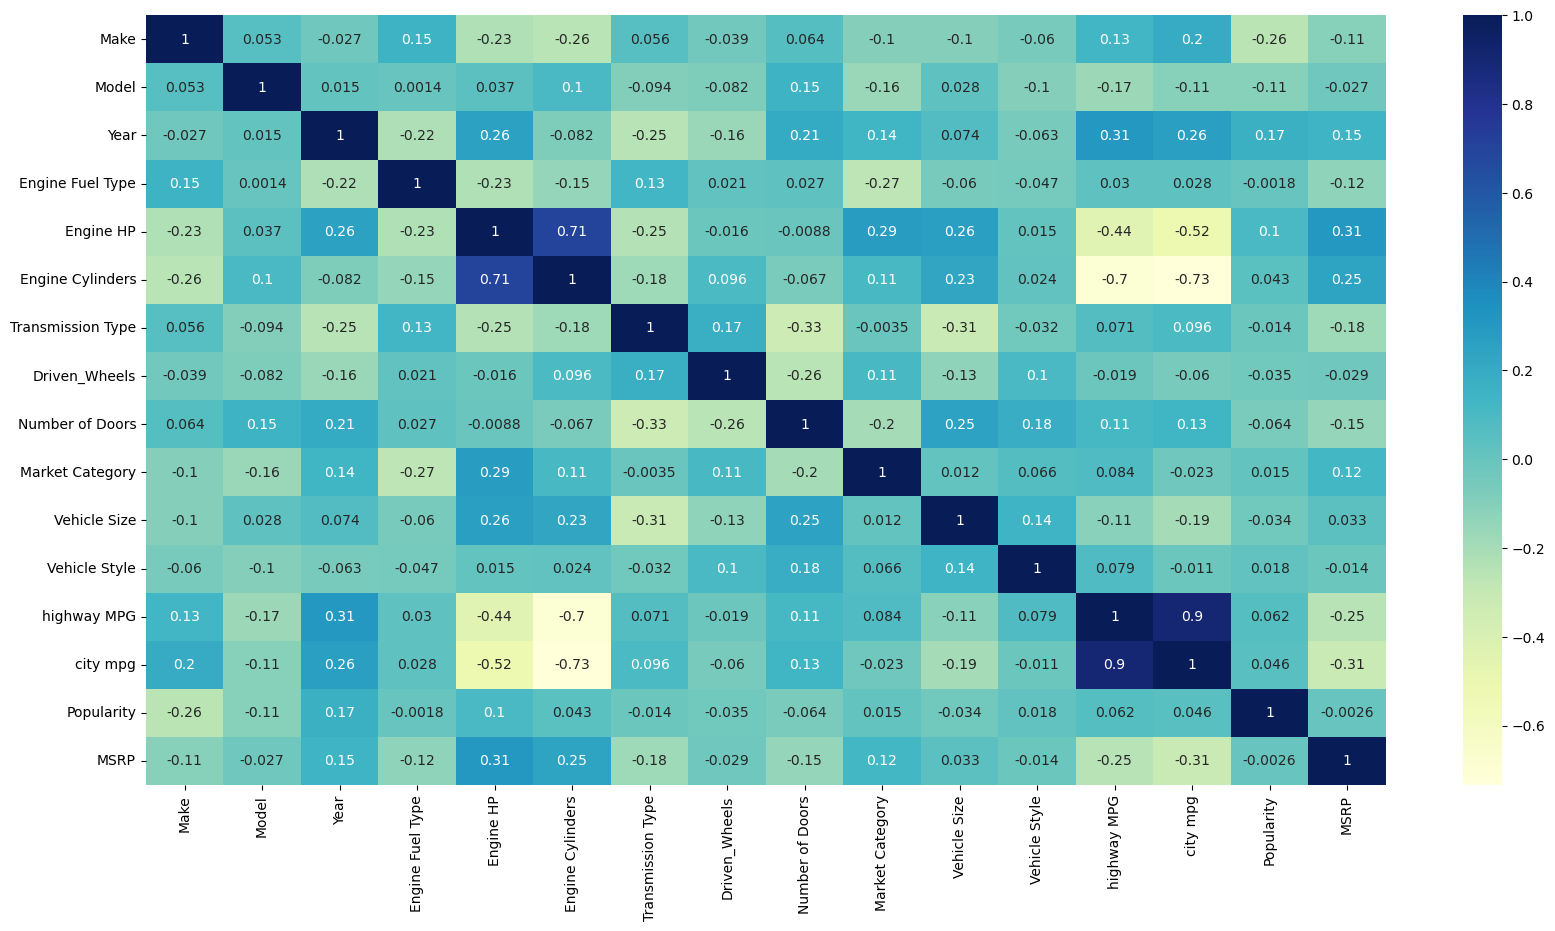

In [70]:
%matplotlib inline
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

highly correlated features: 
city mpg and highway MPG
Engine Cylinders and Engine HP,
city mpg and Engine Cylinders
highway MPG and Engine Cylinders

Droping features: highway MPG, Engine Cylinders

In [71]:
# droping highly correlated features
data.drop(data[['highway MPG','Engine Cylinders']],axis=1, inplace=True)

### Modelling

Regression modelling will be done inorder to predict car price, target column being 'MSRP'

In [72]:
# Split data into features and targets
y = data['MSRP']
x = data.drop(['MSRP'],axis=1)

In [73]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit and transform the data
x = scaler.fit_transform(x)

In [74]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
# Modeling using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Fit the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 267312746.3373516
R-squared (R2) Score: 0.9254456622059816


Text(0.5, 1.0, 'Actual Vs Predicted price')

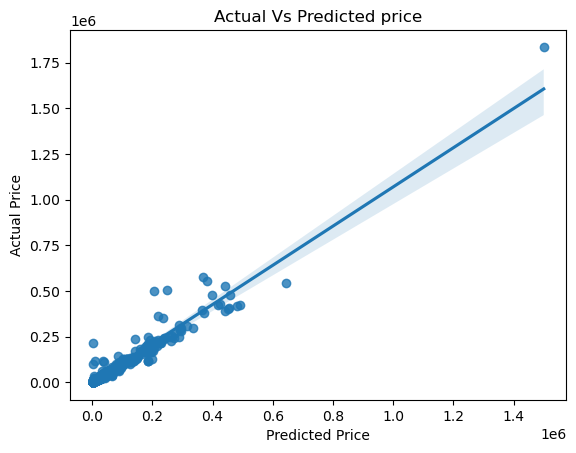

In [77]:
sns.regplot(x=y_test, y=y_pred_rf)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Vs Predicted price')

In [79]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value (regularization strength) as needed

# Fit the model on the training data
lasso_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(x_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 2778572386.397107
R-squared (R2) Score: 0.22504771239321886


Text(0.5, 1.0, 'Actual Vs Predicted price')

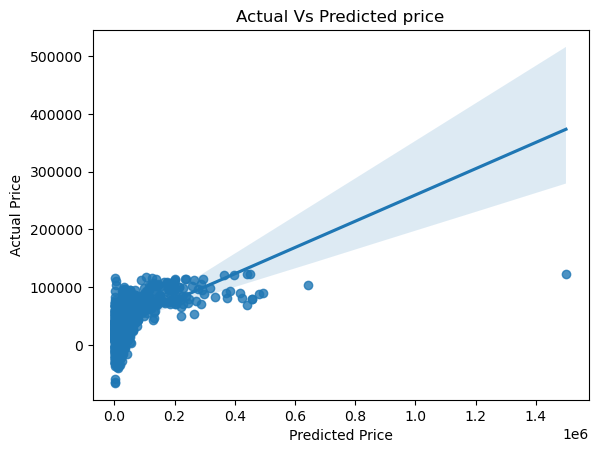

In [80]:
sns.regplot(x=y_test, y=y_pred_lasso)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Vs Predicted price')

We can see Random Forest has R2 Score of 0.92 which is best model for this dataset

### Hyperparameter tuning

In [82]:
# Tuning Random Forest Model to improve performance
# Tuning using GridSearchCV method
from sklearn.model_selection import GridSearchCV


# Define the reduced parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 5],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search model on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters found during the tuning process
best_params = grid_search.best_params_

# Initialize a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params)

# Fit the model on the training data using the best hyperparameters
best_rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(x_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 170611106.0899048
R-squared (R2) Score: 0.9524160437198705


By tuning the model, we successfully reduced Mean Squared Error (MSE) from 2778572386.397107 to 170611106.0899048

Text(0.5, 1.0, 'Actual Vs Predicted price')

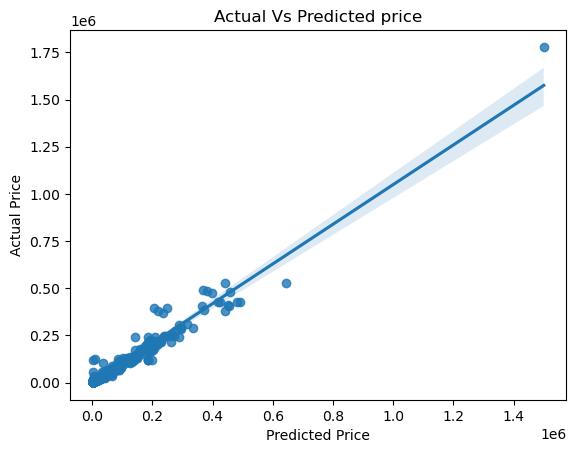

In [83]:
# Plotting actual vs predicted price
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Vs Predicted price')

From the graph we can see, almost linear relationship between actual and predicted price. Hence our model performs good.

In conlusion, R2-Score of 0.92 is obtained using RandomForestRegressor model and with tuning, mean squared error is further reduced. And plotting Actual Vs Predicted target value also shows model performs well